In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(2022314416)
np.random.seed(2022314416)
NUMSAMPLES = [10, 100, 500, 1000]

In [10]:
def generate_data(x_type:str,
             std:float=5.,
             x_min:float=0.,
             x_max:float=50.,
             NUMSAMPLE=10,
             )->tuple:
    '''
    # args
    x_type : how to generate X? choices either "uniform" or "gaussian"
    std    : standard deviation for gaussian generator. Defalut 5
    x_min, x_max : range of X in uniform case. Takes mean of two value as mean for gaussian distribution
    --------
    # returns
    x: randomly generated X for simulation
    y: generated Y following formula (a*x + b + N(mu, sigma)) where N(mu, sigma) is the gaussian distribution
    a, b: randomly choices coefficients
    '''
    a  = np.random.rand()
    b  = np.random.rand()
    print(f'a: {a:.4f}, b: {b:.4f},number of sample: {NUMSAMPLE}')
    if x_type == 'uniform':
        x = np.random.uniform(x_min, x_max, NUMSAMPLE)
    elif x_type == 'gaussian':
        x = np.random.normal(np.mean([x_min, x_max]), std, NUMSAMPLE)
    else:
        print("WRONG X TYPE")
        return None, None
    y = a*x + b + np.random.randn(NUMSAMPLE)
    return x, y, a, b

def calc_w(x:np.array,
           y:np.array
           )->float:
    '''
    # args
    x: randomly generated X
    y: generated Y from generate_data() func
    --------
    # returns
    the result of operation ((X^T*X)^-1)*X^T*y
    '''
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)[0]

def linear_regression(x, y):
    '''
    # args
    x: randomly generated X
    y: generated Y from generate_data() func
    --------
    # returns
    y_hat: the function values of regression
    a_hat: the calculated coefficient of regression
    b_hat: the calculated constant term of regression
    '''
    x_ = (x-np.mean(x)).reshape(-1, 1)      # zero mean
    y_ = y-np.mean(y)                       # zero mean
    a_hat = calc_w(x_, y_)                  # calculate the slope first
    b_hat = np.mean(y) - a_hat*np.mean(x)   # calculate the y-intercept
    y_hat = a_hat*x + b_hat                 
    return y_hat, a_hat, b_hat

a: 0.4581, b: 0.2041,number of sample: 10


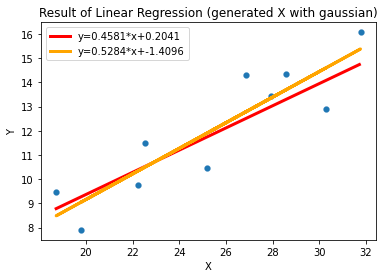

a: 0.0576, b: 0.2519,number of sample: 10


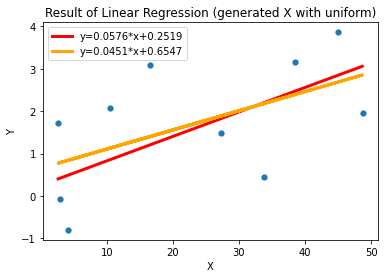

a: 0.6366, b: 0.7623,number of sample: 100


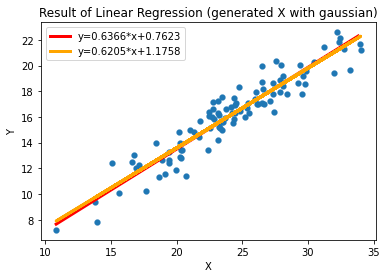

a: 0.0794, b: 0.8636,number of sample: 100


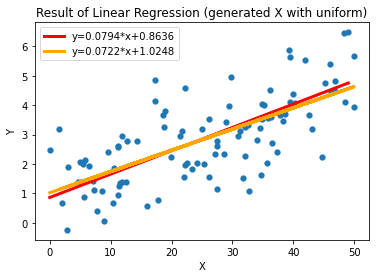

a: 0.6395, b: 0.1946,number of sample: 500


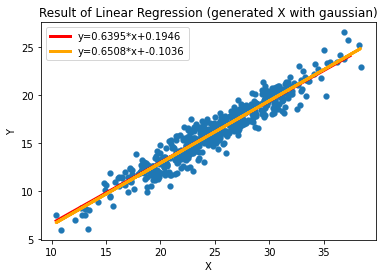

a: 0.7114, b: 0.8016,number of sample: 500


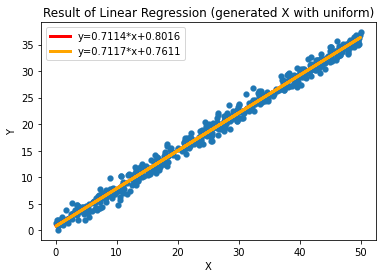

a: 0.8945, b: 0.3553,number of sample: 1000


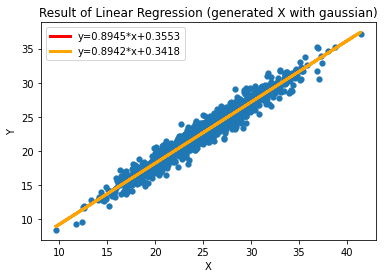

a: 0.7287, b: 0.1952,number of sample: 1000


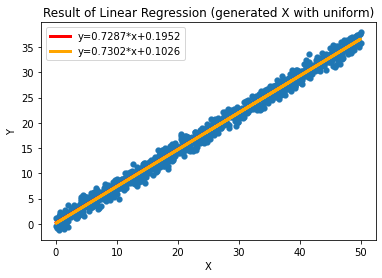

In [11]:
x_types = ['gaussian', 'uniform']
for NUMSAMPLE in NUMSAMPLES:
    for x_type in x_types:
        x, y, a, b = generate_data(x_type=x_type, NUMSAMPLE=NUMSAMPLE)
        x_ = np.arange(x.min(), x.max())
        y_ = a*x_ + b

        y_hat, a_hat, b_hat = linear_regression(x, y)

        plt.scatter(x, y, linewidth=0.2)
        plt.plot(x_, y_  , label=f'y={a:.4f}*x+{b:.4f}'        , color='red'   , linewidth=3)
        plt.plot(x, y_hat, label=f'y={a_hat:.4f}*x+{b_hat:.4f}', color='orange', linewidth=3)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.title(f'Result of Linear Regression (generated X with {x_type})')
        plt.show()